INTRODUCCIÓN
==========================================

Regresión logística con pytorch sobre el dataset Heart Failure Clinical Records (2020). <br>
Fuente: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

CONJUNTO DE DATOS
==========================================

Los datos son reales y provienen de un hospital sin mencionar. Contiene 5000 filas de pacientes que sufrieron un accidente cardiovascular y posteriormente un monitoreo durante un tiempo determinado.

Columnas:

| Nombre | Tipo dato | Descripción | Unidad |
| --- | --- | --- | --- |
| Age | Integer | Edad | Años |
| Anaemia | Binary | Disminución en hemoglobina | - |
| Creatinine_phosphokinase | Integer | Nivel encima CPK en sangre | mcg/L |
| Diabetes | Binary | Tiene diabetes ? | - |
| Ejection_fraction | Integer | Porcentaje de sangre en cada contracción | % 
| High_blood_pressure | Binary | Tiene hipertensión ? | - |
| Platelets | Float | Plaquetas en sangre | kiloplatelets/mL |
| Serum_creatinine | Float | Nivel de creatinina en sangre | mg/dL |
| Serum_sodium | Integer | Nivel de sodio en sangre | mEq/L |
| Sex | Binary | Mujer (0) u hombre (1) | - |
| Smoking | Binary | Fuma ? | - |
| Time | Integer | Seguimiento | Dias |
| Death_event | Binary | Fallecimiento | - |


CONCEPTOS BÁSICOS
==========================================

Para entender mejor de qué va el trabajo es necesario conocer antes una serie de conceptos sobre los recursos y otras herramientas usadas:
- <b>Redes neuronales</b>: Una red neuronal es un modelo computacional inspirado en el funcionamiento del cerebro humano. Está compuesta por un conjunto de nodos o "neuronas" interconectadas que procesan información. Aprenden a realizar tareas al considerar ejemplos, generalmente sin ser programadas con reglas específicas para la tarea.
- <b>Regresión logística</b>: Algoritmo de aprendizaje supervisado que se utiliza en la clasificación binaria, es decir, tareas donde la variable de salida puede tomar dos valores posibles (0 y 1, verdadero y falso, etc).
- <b>Pandas</b>: Biblioteca de Python que proporciona estructuras de datos y herramientas de análisis de datos flexibles y eficientes. Es fundamental para realizar tareas de manipulación de datos y limpieza.
- <b>Pytorch</b>: Es una biblioteca de aprendizaje automático de código abierto para Python, desarrollada principalmente por el grupo de investigación de inteligencia artificial de Facebook(Meta). Proporciona dos características de alto nivel: operaciones tensoriales con soporte para GPU y redes neuronales profundas.
- <b>Tensores</b>: Un tensor es una estructura de datos generalizada que es una extensión de matrices multidimensionales. En el contexto de PyTorch y otras bibliotecas de aprendizaje profundo, los tensores son la estructura de datos principal con la que se trabaja.
Los tensores son similares a los arrays de NumPy, pero también tienen soporte para GPU y otras características que los hacen adecuados para el cálculo de redes neuronales.
- <b>Función de perdida</b>: También conocida como función de coste, es una fórmula matemática que mide cuán bien el modelo está realizando su tarea, ya sea la clasificación, la regresión, etc. Las ha de varios tipos, según la naturaleza de los datos. Algunos ejemplos son BCELoss o MSELoss.
- <b>Optimizador</b>: Es un algoritmo o método que se utiliza para ajustar los parámetros de un modelo con el objetivo de minimizar la función de pérdida. Como la función de perdida también hay multitud y debemos buscar el más adecuado para nuestra carga de trabajo. Algunos ejemplos son Adam, adagrad, Rmsprop...
- <b>Train y test</b>: Sets (conjunto de datos) de entrenamiento y de validación (test). Para entrenar un modelo es necesario dividir nuestros datos en dos sets, uno de entrenamiento sobre el que realizaremos todo el trabajo y otro de test con el que comprobaremos la validad de los datos. Deben ser distintos.
- <b>Normalización de datos</b>: El objetivo de la normalización es cambiar los valores de las columnas numéricas en el conjunto de datos a una escala común, sin distorsionar las diferencias en los rangos de valores o perder información.
- <b>Epoch</b>: Iteracciones de entrenamiento, ciclos. Debemos jugar con este parametro númerico y otros para poder entrenar nuestro módelo de forma óptima.
- <b>Tasa de aprendizaje</b>: Otro parametro de entrenamiento que define cuán rapido aprende nuestro modelo. Se usan valores del estilo 0.1, 0.01... También debemos probar bien ya que no siempre un valor más alto nos lleva a un entrenamiento más rapido y efectivo.
- <b>Backward pass</b>: Durante este paso, se calculan los gradientes de la función de pérdida con respecto a los parámetros del modelo (pesos y sesgos), utilizando un algoritmo llamado retropropagación.

IMÁGENES
=======================================
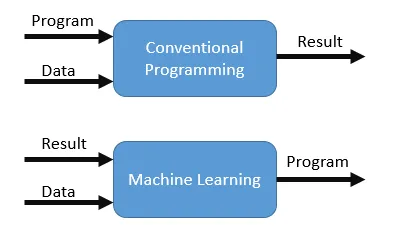 <br>
*Programación tradicional vs. Machine Learning*

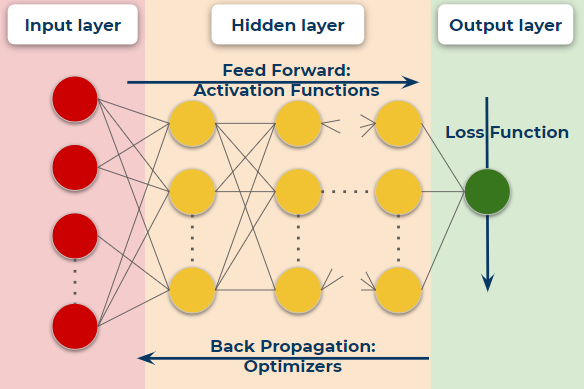 <br>
*Flujo de una red neuronal: Input -> Función Activación -> Output -> Backward pass*

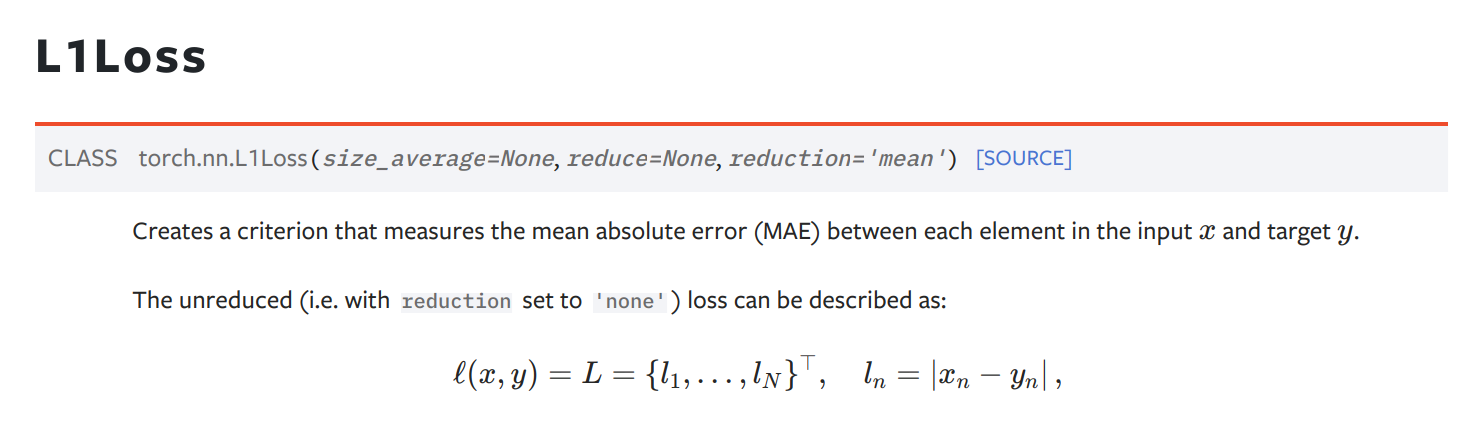 <br>
*Funcionamiento de la función de perdida L1Loss*

## Tratamiento de los datos

In [1]:
#Importamos las librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Cargamos el dataset y mostramos las primeras filas
data = pd.read_csv('heart_failure.csv')
print(data.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  55.0        0                       748         0                 45   
1  65.0        0                        56         0                 25   
2  45.0        0                       582         1                 38   
3  60.0        1                       754         1                 40   
4  95.0        1                       582         0                 30   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0  263358.03               1.3           137    1   
1                    0  305000.00               5.0           130    1   
2                    0  319000.00               0.9           140    0   
3                    1  328000.00               1.2           126    1   
4                    0  461000.00               2.0           132    1   

   smoking  time  DEATH_EVENT  
0        1    88            0  
1        0   207            0  
2       

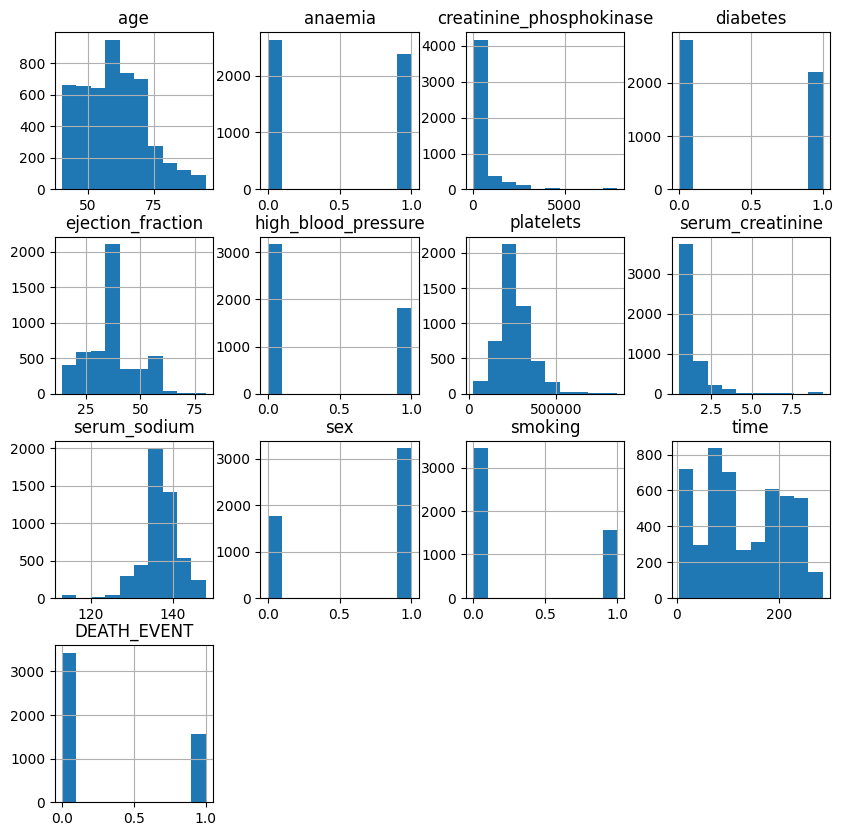

In [3]:
# Mostramos un gráfico de distribución de las distintas variables
data.hist(figsize = (10,10))
plt.show()

In [4]:
# Un pequeño resumen de los datos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB
None


               age      anaemia  creatinine_phosphokinase     diabetes  \
count  5000.000000  5000.000000               5000.000000  5000.000000   
mean     60.288736     0.474400                586.760600     0.439400   
std      11.697243     0.499394                976.733979     0.496364   
min      40.000000     0.000000                 23.000000     0.000000   
25%      50.000000     0.000000                121.000000     0.000000   
50%      60.000000     0.000000                248.000000     0.000000   
75%      68.000000     1.000000                582.000000     1.000000   
max      95.000000     1.000000               7861.000000     1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count        5000.000000          5000.000000    5000.000000   
mean           37.734600             0.364800  265075.404370   
std            11.514855             0.481422   97999.758622   
min            14.000000             0.000000   25100.000000   
25%          

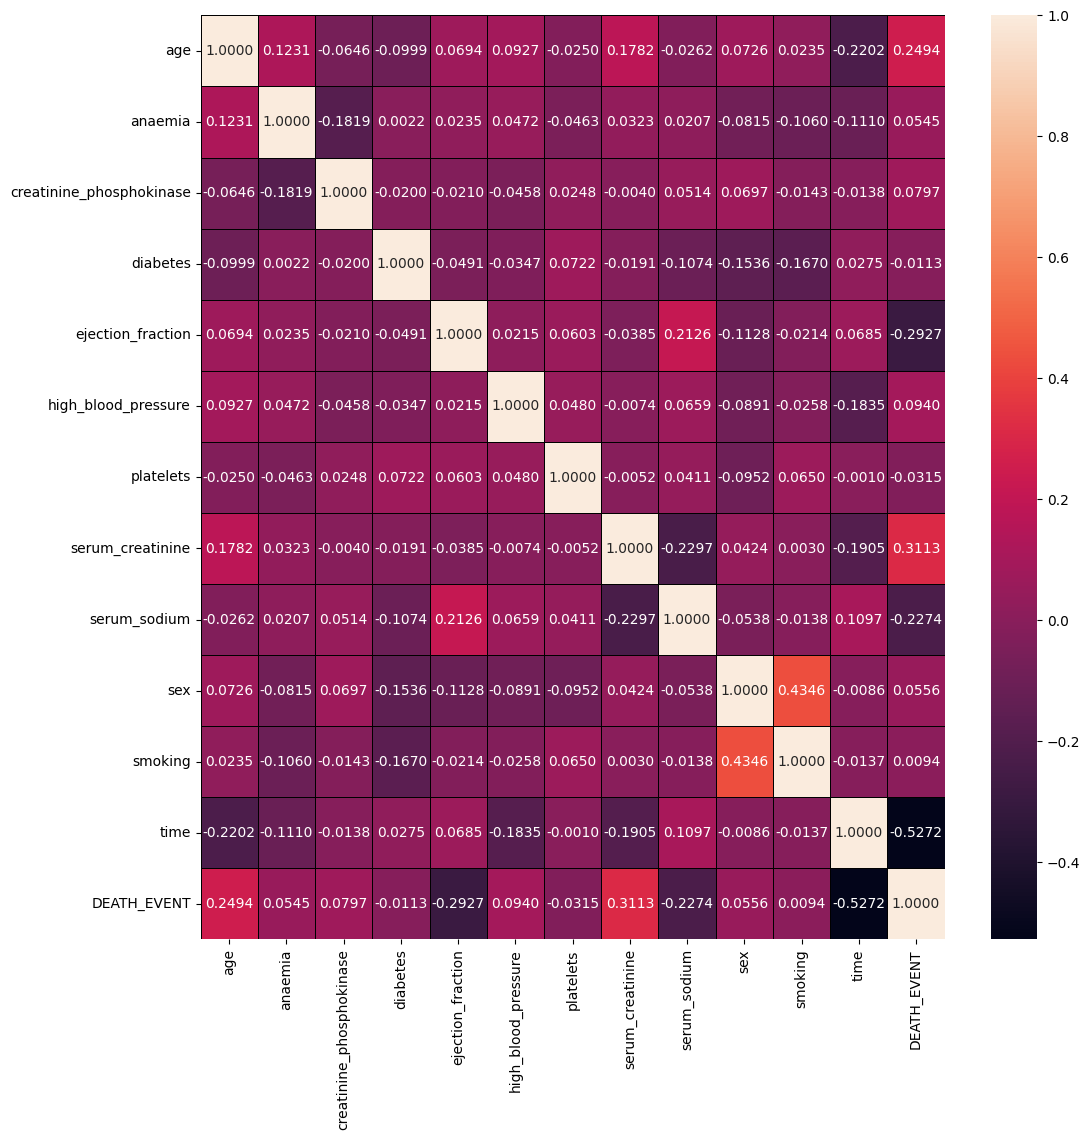

In [5]:
#Más información acerca de los datos
print(data.describe())

# Correlación de las variables
#print(data.corr())

# Usamos la librearía seaborn para visualizar la correlación
f, ax = plt.subplots(figsize = (12,12))
sns.heatmap(data.corr(), annot = True, linewidths=0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

# Entrenamiento del modelo

### 1. Imports y otras variables auxiliares

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
import torch.nn as nn
import torch
import time

# Copiamos los datos originales a una variable auxiliar que usaremos más tarde para añadir la columna de prediccion al dataset completo original
original_data = data.copy()

# Definimos el dispositivo donde se ejecutará el modelo. GPU si está disponible, de lo contrario, CPU.
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

### 2. Adaptación y adecuamiento del dataset

In [7]:
# Variables dependiente(y) e independientes(X). Nuestro objetivo es predecir la variable dependiente DEATH_EVENT.
X, y = data.drop('DEATH_EVENT', axis=1), data['DEATH_EVENT']

# Imprimos las columnas de X e y
print(X.columns)
print(y.name)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')
DEATH_EVENT


In [8]:
#Dividir los datos en entrenamiento y test. 66% para entrenamiento y 33% para test. Semilla para garantizar reproducibilidad.
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.66, random_state=33)

#Imprimos en pantalla las dimensiones de los conjuntos de entrenamiento y test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3300, 12) (1700, 12) (3300,) (1700,)


In [9]:
# Normalización de los datos. Los tensores para poder trabajar necesitan que todos los datos se encuentren en una escala común. Para ello se usan la media y la desviación estándar entre otros cálculos.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Imprimos p.ej los valores de X_train
print(X_train)

[[ 0.41586072  1.05868911 -0.47080728 ...  0.73379939 -0.6836072
   0.838854  ]
 [-0.184176    1.05868911 -0.47184407 ...  0.73379939 -0.6836072
  -0.61423081]
 [-0.44133459 -0.94456436  1.48146959 ...  0.73379939  1.46282835
  -0.7320485 ]
 ...
 [-0.86993224  1.05868911 -0.48428556 ...  0.73379939 -0.6836072
   0.59012777]
 [ 0.41586072  1.05868911 -0.46977049 ... -1.36277029 -0.6836072
   0.838854  ]
 [ 1.01589743 -0.94456436 -0.23234542 ...  0.73379939  1.46282835
  -0.92841131]]


In [10]:
# Convertir los datos a tensores con los que podamos trabajar
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# Mover los datos a la GPU
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

# Redimensionar y_train y y_test. Solo predecimos una columna.
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

### 3. Definición del modelo

In [11]:
# Definir el modelo. Heredamos de la clase nn.Module.
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features, n_hidden_layers):
        super(LogisticRegression, self).__init__()
        self.hidden = nn.Linear(n_input_features, n_hidden_layers) 
        self.output = nn.Linear(n_hidden_layers, 1)

    def forward(self, x):
        x = torch.sigmoid(self.hidden(x))
        y_predicted = torch.sigmoid(self.output(x)) #Función de activación sigmoide para obtener valores entre 0 y 1
        return y_predicted

### 4. Hiperparámetros y pasos previos al entrenamiento

In [12]:
# Número de características de entrada. n_samples = número de filas, n_features = número de columnas.
n_samples, n_features = X.shape

# Número de neuronas en la capa oculta
hidden_layers = 20

# Tasa de aprendizaje. Define la "velocidad" a la que se actualizan los pesos. Si es muy alta, el modelo puede no converger (encontrar un mínimo). Si es muy baja, el modelo puede tardar mucho en converger.
learning_rate = 0.05

# Epochs (iteraciones)
num_epochs = 15000

# Instanciar el modelo
model = LogisticRegression(n_features, hidden_layers).to(device)

# Funciones de pérdida y optimizador
criterion = nn.MSELoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate)

### 5. Entrenamiento

Epoch: 10, pérdida = 0.1593
Epoch: 20, pérdida = 0.1350
Epoch: 30, pérdida = 0.1256
Epoch: 40, pérdida = 0.1212
Epoch: 50, pérdida = 0.1187
Epoch: 60, pérdida = 0.1166
Epoch: 70, pérdida = 0.1146
Epoch: 80, pérdida = 0.1125
Epoch: 90, pérdida = 0.1102
Epoch: 100, pérdida = 0.1080
Epoch: 110, pérdida = 0.1058
Epoch: 120, pérdida = 0.1038
Epoch: 130, pérdida = 0.1018
Epoch: 140, pérdida = 0.0998
Epoch: 150, pérdida = 0.0979
Epoch: 160, pérdida = 0.0959
Epoch: 170, pérdida = 0.0940
Epoch: 180, pérdida = 0.0922
Epoch: 190, pérdida = 0.0904
Epoch: 200, pérdida = 0.0888
Epoch: 210, pérdida = 0.0872
Epoch: 220, pérdida = 0.0857
Epoch: 230, pérdida = 0.0842
Epoch: 240, pérdida = 0.0828
Epoch: 250, pérdida = 0.0814
Epoch: 260, pérdida = 0.0801
Epoch: 270, pérdida = 0.0789
Epoch: 280, pérdida = 0.0776
Epoch: 290, pérdida = 0.0764
Epoch: 300, pérdida = 0.0753
Epoch: 310, pérdida = 0.0742
Epoch: 320, pérdida = 0.0731
Epoch: 330, pérdida = 0.0720
Epoch: 340, pérdida = 0.0710
Epoch: 350, pérdida = 0

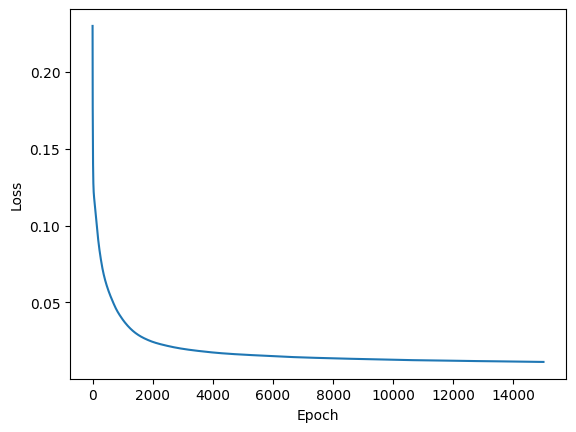


=== Estadísticas de la validación ===
Nº registros: 1700
Precisión: 97.35%
Errores: 45
Dudosos: 8 (0.47%)

=== Estadísticas ===
TPR: 0.96
TNR: 0.98
FPR: 0.02
FNR: 0.04
ROC AUC: 0.98

=== Matriz de confusión ===
           Predicción
Real       0          1         
0          1135       22        
1          23         520       


In [13]:
# Almacenar la pérdida. Se usará en la representación gráfica.
losses = []

t0 = time.time()
for epoch in range(num_epochs):
    # Forward pass (predicción)
    y_predicted = model(X_train)

    # Calculamos la pérdida y la almacenamos para su representación gráfica
    loss = criterion(y_predicted, y_train)
    losses.append(loss.item())

    # Backward pass. Se calcula el gradiente de la función de pérdida con respecto a los parámetros del modelo.
    loss.backward()
    
    # Update. Actualizamos los parámetros del modelo con la nueva información
    optimizer.step()
    
    # Limpiamos los gradientes
    optimizer.zero_grad()
    
    # Imprimimos la pérdida cada 10 iteraciones
    if (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch+1}, pérdida = {loss.item():.4f}')

print(f'\nDispositivo usado en el entrenamiento: ', device)
print(f'Tiempo de entrenamiento: {time.time()-t0:.2f} segundos')
print('Epoch/s: {:.2f}'.format(num_epochs/(time.time()-t0)))

# Representar pérdida
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Evaluamos la precisión del modelo con el conjunto de test
with torch.no_grad():
    y_predicted = model(X_test)

    # Estadísticas
    acc = torch.sum(y_predicted.round() == y_test)/len(y_test)
    misses = torch.sum(y_predicted.round() != y_test)
    doubtful = torch.sum((y_predicted >= 0.4) & (y_predicted <= 0.6)) # Consideramos dudosos aquellos valores entre 0.4 y 0.6

    TP = torch.sum((y_predicted.round() == 1) & (y_test == 1))
    TN = torch.sum((y_predicted.round() == 0) & (y_test == 0))
    FP = torch.sum((y_predicted.round() == 1) & (y_test == 0))
    FN = torch.sum((y_predicted.round() == 0) & (y_test == 1))

    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    FPR = FP/(FP+TN)
    FNR = FN/(FN+TP)
    y_test = y_test.cpu().numpy()
    y_predicted = y_predicted.cpu().numpy()
    roc_auc = roc_auc_score(y_test, y_predicted)

    print('\n=== Estadísticas de la validación ===')
    print(f'Nº registros: {len(y_test)}')
    print(f'Precisión: {acc.item()*100:.2f}%')
    print(f'Errores: {misses.item()}')
    print(f'Dudosos: {doubtful.item()} ({doubtful.item()/len(y_test)*100:.2f}%)')  

    print('\n=== Estadísticas ===')
    print(f'TPR: {TPR.item():.2f}')
    print(f'TNR: {TNR.item():.2f}')
    print(f'FPR: {FPR.item():.2f}')
    print(f'FNR: {FNR.item():.2f}')
    print(f'ROC AUC: {roc_auc:.2f}')

    print('\n=== Matriz de confusión ===')
    print(f'{"":<10} {"Predicción"}')
    print(f'{"Real":<10} {"0":<10} {"1":<10}')
    print(f'{"0":<10} {TN.item():<10} {FP.item():<10}')
    print(f'{"1":<10} {FN.item():<10} {TP.item():<10}')

### 6. Predicciones

In [14]:
# Predecimos el conjunto original de datos. Añadimos la columna de predicción al dataset original.
with torch.no_grad():
    original_data['PREDICT'] = model(torch.from_numpy(sc.transform(original_data.drop('DEATH_EVENT', axis=1).values).astype(np.float32)).to(device)).cpu().numpy().round().astype(int)
    original_data['P1'] = model(torch.from_numpy(sc.transform(original_data.drop(['DEATH_EVENT', 'PREDICT'], axis=1).values).astype(np.float32)).to(device)).cpu().numpy().round(4)
    original_data['ERROR'] = np.abs(original_data['P1'] - original_data['DEATH_EVENT']).round(4)
    
# Mostramos las primeras filas. Vemos que coinciden las predicciones con la variable DEATH_EVENT.
print(original_data.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  55.0        0                       748         0                 45   
1  65.0        0                        56         0                 25   
2  45.0        0                       582         1                 38   
3  60.0        1                       754         1                 40   
4  95.0        1                       582         0                 30   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0  263358.03               1.3           137    1   
1                    0  305000.00               5.0           130    1   
2                    0  319000.00               0.9           140    0   
3                    1  328000.00               1.2           126    1   
4                    0  461000.00               2.0           132    1   

   smoking  time  DEATH_EVENT  PREDICT      P1   ERROR  
0        1    88            0        0  0.0000 

In [15]:
# Guardamos modelo y dataset con predicciones. Lo podríamos usar para futuras predicciones.
user_input = input('\n¿Desea guardar el modelo y dataset con las predicciones? (S/N): ')
if user_input.lower() == 's':
    torch.save(model.state_dict(), 'model.pth')
    original_data.to_csv('heart_failure_predict.csv', index=False)
    print('Guardado correctamente.')


¿Desea guardar el modelo y dataset con las predicciones? (S/N):  s


Guardado correctamente.


Ahora podemos usar el modelo entrenado para predecir

In [17]:
# Calculamos las medias
edad_mean = data['age'].mean()
creatinina_mean = data['creatinine_phosphokinase'].mean()
ejection_mean = data['ejection_fraction'].mean()
plaquetas_mean = data['platelets'].mean()
serum_mean = data['serum_creatinine'].mean()
sodio_mean = data['serum_sodium'].mean()
tiempo_mean = data['time'].mean()

# Pide al usuario que ingrese los valores de las variables independientes
edad_i = input(f'Edad ({edad_mean} años): ')
anemia_i = input('Anemia (0 o 1): ')
creatinina_i = input(f'Creatinina fosfoquinasa ({creatinina_mean} mcg/L): ')
diabetes_i = input('Diabetes (0 o 1): ')
ejection_i = input(f'Fracción de eyección ({ejection_mean} %): ')
hipertension_i = input('Hipertensión (0 o 1): ')
plaquetas_i = input(f'Plaquetas ({plaquetas_mean} kilopl/mL): ')
serum_i = input(f'Serum creatinina ({serum_mean} mg/dL): ')
sodio_i = input(f'Sodio ({sodio_mean}): ')
sexo_i = input('Sexo (0 mujer o 1 hombre): ')
smoking_i = input('Fumador (0 o 1): ')
tiempo_i = input(f'Tiempo ({tiempo_mean} dias): ')

# Asignamos la media si no se introduce nada
edad_v = edad_mean if edad_i == '' else float(edad_i)
anemia_v = 0 if anemia_i == '' else int(anemia_i)
creatinina_v = creatinina_mean if creatinina_i == '' else float(creatinina_i)
diabetes_v = 0 if diabetes_i == '' else int(diabetes_i)
ejection_v = ejection_mean if ejection_i == '' else float(ejection_i)
hipertension_v = 0 if hipertension_i == '' else int(hipertension_i)
plaquetas_v = plaquetas_mean if plaquetas_i == '' else float(plaquetas_i)
serum_v = serum_mean if serum_i == '' else float(serum_i)
sodio_v = sodio_mean if sodio_i == '' else float(sodio_i)
sexo_v = 0 if sexo_i == '' else int(sexo_i)
smoking_v = 0 if smoking_i == '' else int(smoking_i)
tiempo_v = tiempo_mean if tiempo_i == '' else float(tiempo_i)

# Prepara los datos de entrada
X_new = np.array([edad_v, anemia_v, creatinina_v, diabetes_v, ejection_v, hipertension_v, plaquetas_v, serum_v, sodio_v, sexo_v, smoking_v, tiempo_v])

# Realiza la predicción
with torch.no_grad():
    tensor = torch.from_numpy(sc.transform(X_new.reshape(1, -1).astype(np.float32))).to(device)
    y_pred = model(tensor)
    print('Probabilidad de fallecimiento: {:.2%}'.format(y_pred.item()))

Edad (60.288736400000005 años):  90
Anemia (0 o 1):  1
Creatinina fosfoquinasa (586.7606 mcg/L):  
Diabetes (0 o 1):  1
Fracción de eyección (37.7346 %):  
Hipertensión (0 o 1):  1
Plaquetas (265075.40437 kilopl/mL):  
Serum creatinina (1.369106 mg/dL):  
Sodio (136.8082):  
Sexo (0 mujer o 1 hombre):  
Fumador (0 o 1):  
Tiempo (130.6788 dias):  


Probabilidad de fallecimiento: 99.96%
